In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
from matplotlib import pyplot as plt
import numpy as np
from classy import Class
import work_in_class.cosmo_extra as cosmo_extra
from work_in_class import wicmath
import common as co
import os
from scipy.interpolate import interp1d

from analyze_coeffs import Analyze


# Check results 

In [6]:
# output = '../../output/fit2019_03_12/quintessence_monomial-ints-fit-logX-8-Taylor_legacy_c0-ln(1+z)-800699/quintessence_monomial-ints/'
output = '../../output/fit2019_03_12/quintessence_monomial-ints-fit-w-8-Taylor-(1-a)-842770/quintessence_monomial-ints/'
compute_data_dir = os.path.join(output, 'computed_data/')

In [12]:
reldev_obs_fit = np.loadtxt(os.path.join(output, './quintessence_monomial-ints-reldev-obs-joined.txt'), usecols=(1,3,5)).T
coeffs = np.loadtxt(os.path.join(output, './quintessence_monomial-ints-fit-w-joined.txt'))
params = []
with open(os.path.join(output, './quintessence_monomial-ints-params-joined.txt')) as f:
    for line in f:
        if '#' not in line:
            params.append(eval(line))

In [13]:
reldev_obs = np.loadtxt(os.path.join(output, './computed_data/relative-error-dimensions-observables.txt')).T
reldev_H = np.loadtxt(os.path.join(output, './computed_data/relative-error-dimensions-H.txt')).T
reldev_f = np.loadtxt(os.path.join(output, './computed_data/relative-error-dimensions-f.txt')).T
reldev_DA = np.loadtxt(os.path.join(output, './computed_data/relative-error-dimensions-DA.txt')).T

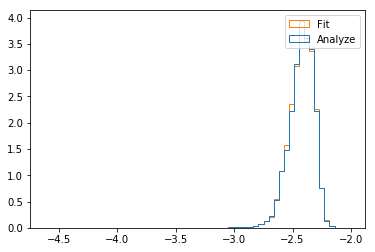

In [14]:
X = reldev_obs[-1]
plt.hist([np.log10(X[np.isfinite(X)]), np.max(np.log10(reldev_obs_fit), axis=0)], bins=60,
         histtype='step', normed=True, label=['Analyze', 'Fit']);
plt.legend(loc=0);
plt.show()
plt.close()

In [15]:
np.isfinite(X).sum()

20000

In [16]:
for i in reldev_obs:
    x = np.sum(np.log10(i)>-2)
    print(x, x/len(i), x/len(i) < 0.01)

(15857, 0, True)
(15759, 0, True)
(14632, 0, True)
(15141, 0, True)
(13488, 0, True)
(13373, 0, True)
(604, 0, True)
(0, 0, True)


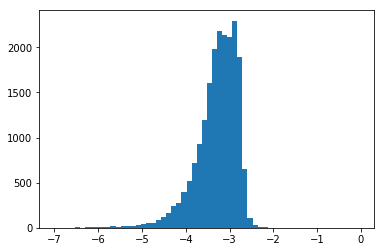

In [17]:
X = np.abs(reldev_H[-1]/reldev_obs_fit[0, :] - 1)
plt.hist(np.log10(X[np.isfinite(X)]), bins=60);

In [19]:
X = reldev_f[-1]
ix = np.argmax(X)
print(ix)
print(X[ix])
print(coeffs[ix])
print(reldev_H[-1,ix])
print(reldev_obs_fit[0,ix])

12498
0.00975993779080575
[-9.27583798e-01 -2.56235577e+00  4.77043865e+01 -5.24523160e+02
  2.98931618e+03 -1.66918427e+03 -7.80035352e+04  3.23939716e+05]
0.00243350118188157
0.0024281479323216004


In [14]:
# ix = np.nanargmax(X)
# print(ix)
# print(X[ix])
# print(coeffs[ix])
# print(reldev_H[-1,ix])
# print(reldev_obs_fit[0,ix])

In [15]:
cosmo = Class()
cosmo.set(params[ix])
cosmo.compute()
b = cosmo.get_background()
obs, rec = co.compute_observables_th(cosmo, 10)
zrec = rec[0]
zmax = zrec+200
zFull = b['z']
z = zFull[zFull <= zmax]
lna = np.log(z+1)
rhoM = (b['(.)rho_b'] + b['(.)rho_cdm'])[zFull <= zmax]
rhoR = (b['(.)rho_ur'] + b['(.)rho_g'])[zFull <= zmax]
_, H, DA, f = obs

In [16]:
logX = wicmath.Taylor_legacy_c0(lna, coeffs[ix])
rhoDE_fit = b['(.)rho_smg'][-1] * np.exp(logX)
w_fit = (np.gradient(logX, lna) - 1)/3.
obs_fit, rec_fit = co.compute_observables_fit(z, rhoM, rhoR, rhoDE_fit, w_fit, f[0], z_rec=zrec)
_, H_fit, DA_fit, f_fit = obs_fit

/usr/lib64/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
../common.py:103: RuntimeWarning: invalid value encountered in divide
  OmegaMF_fit = interp1d(Z, (1-rhoDE_fit/H_fit**2-rhoR/H_fit**2)[index_to_compare])  ####### THIS FITS OBSERVABLES CORRECTLY
../common.py:104: RuntimeWarning: invalid value encountered in divide
  OmegaDEwF_fit = interp1d(Z, (rhoDE_fit/H_fit**2 * w_fit)[index_to_compare])


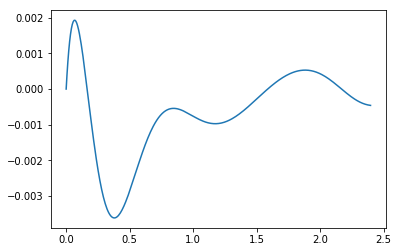

In [17]:
plt.plot(lna[z<10], H_fit[z<10]/H - 1)

In [14]:
# cosmo2 = Class()
# cosmo2.set({'h': 0.7322322325495954, 'output': 'mPk', 'z_max_pk': 10,
#             'parameters_smg': '7, 1.0, 1e-100, 5.736401570929307', 'Omega_Lambda': 0, 
#             'Omega_fld': 0, 'gravity_model': 'quintessence_monomial', 'Omega_smg': -1, 'Omega_cdm': 0.25109538742250304})
# cosmo2.compute()

In [ ]:
a

# Check transformation matrix

In [48]:
outdir = '../../output/fit2019_03_12/quintessence_monomial-ints-fit-logX-8-Taylor_legacy_c0-ln(1+z)-800699/'
#rho_file = '../prueba4/quintessence_monomial-ints-fit-logX-8-Taylor_legacy_c0-ln(1+z)/quintessence_monomial-ints/computed_data/original-rho0s.txt'

analyze = Analyze(
    preroot = outdir,
    multiprocess=False
)

analyze.prepare_histograms()
analyze.compute_fitted_functions_reduced()

../../output/fit2019_03_12/quintessence_monomial-ints-fit-logX-8-Taylor_legacy_c0-ln(1+z)-800699/quintessence_monomial-ints/quintessence_monomial-ints-fit-logX-joined.txt
Fit function detected is Taylor_legacy_c0
Eigenvalues: [7.38e-01 3.71e-01 9.20e-02 7.63e-03 8.21e-04 6.15e-05 3.77e-06 6.04e-08]
Transformation matrix: [[-0.1   0.25 -0.54  0.65 -0.44  0.17 -0.03  0.  ]
 [ 0.79 -0.53  0.05  0.21 -0.2   0.08 -0.02  0.  ]
 [ 0.38  0.22 -0.59 -0.03  0.56 -0.38  0.1  -0.01]
 [ 0.35  0.48 -0.11 -0.5  -0.17  0.55 -0.24  0.03]
 [-0.27 -0.5  -0.36 -0.02  0.37  0.43 -0.46  0.1 ]
 [-0.15 -0.34 -0.45 -0.46 -0.33  0.04  0.55 -0.18]
 [-0.04 -0.09 -0.16 -0.27 -0.42 -0.56 -0.53  0.36]
 [ 0.    0.01  0.02  0.03  0.07  0.16  0.37  0.91]]
Selected 8 out of 8 dimensions. Error in observables lower than 0.01.
(8, 20000)


KeyboardInterrupt: 

In [45]:
analyze.transfMatrix.dot(analyze.hist_orig_scale_orig.covariance).dot(analyze.transfMatrix.T)

array([[ 7.38e-01, -1.84e-17,  1.76e-17, -1.55e-17, -5.32e-17, -2.22e-18,
         7.48e-18,  1.71e-18],
       [-6.32e-17,  3.71e-01,  4.48e-17, -4.67e-17, -3.07e-17,  5.97e-17,
         2.98e-18, -1.04e-19],
       [ 2.22e-17,  5.26e-17,  9.20e-02, -1.28e-17,  5.98e-17, -7.73e-18,
        -5.27e-18,  4.24e-19],
       [ 2.24e-18, -6.63e-17, -1.01e-17,  7.63e-03,  9.94e-18, -5.81e-18,
        -1.21e-17,  2.89e-18],
       [-2.57e-17, -1.04e-17,  6.14e-17,  9.29e-18,  8.21e-04,  2.16e-18,
        -7.96e-18,  1.78e-18],
       [-2.28e-17,  6.36e-17, -5.73e-18, -1.10e-17,  3.93e-18,  6.15e-05,
        -2.72e-17,  4.22e-18],
       [-1.49e-17, -1.95e-18, -1.08e-17, -1.28e-17, -1.01e-17, -3.02e-17,
         3.77e-06,  1.45e-18],
       [ 6.71e-18,  2.02e-19,  1.24e-18,  2.68e-18,  1.80e-18,  4.80e-18,
         1.57e-18,  6.04e-08]])

In [42]:
monomial = analyze

coeffs = monomial.hist_orig_scale_orig.data
mcoeffs = np.mean(coeffs, axis=1)
C = np.cov(coeffs)
val, vec = np.linalg.eigh(C)
val = val[::-1]
vec = vec[:, ::-1]
# T = vec = vec.T[::-1].T
T = vec
new_coeffs = T.T.dot(coeffs - np.mean(coeffs, axis=1).reshape((8, 1)))
new_coeffs_2 = monomial.transfMatrix.dot(coeffs - np.mean(coeffs, axis=1).reshape((8, 1)))

np.all(new_coeffs == monomial.hist_diagonal_orig.data)

print "########### Check C v = l v  ############# "
print val[-1] * vec[:, -1]
print C.dot(vec[:, -1])
print
print "########### Check T.t C T = L  ############# "
print np.diag(T.T.dot(C.dot(T)))
print
print val
print
print "########### Check T C T.t = L from analyze ############# "
print "monomial.transfMatrix = vec.T instead of T = vec"
print np.diag(monomial.transfMatrix.dot(C.dot(monomial.transfMatrix.T)))
print
print monomial.eigenValues
print
print "########### Check cov(new_coeffs) = L ############# "
print np.cov(new_coeffs)
print 
print val
print
print "########### Check cov(new_coeffs_analyze) = L ############# "
#print np.cov(monomial.hist_diagonal_orig.data)
print np.cov(new_coeffs_2)
print 
print val

########### Check C v = l v  ############# 
[1.61e-10 4.49e-10 9.49e-10 1.95e-09 4.20e-09 9.50e-09 2.24e-08 5.51e-08]
[1.61e-10 4.49e-10 9.49e-10 1.95e-09 4.20e-09 9.50e-09 2.24e-08 5.51e-08]

########### Check T.t C T = L  ############# 
[7.38e-01 3.71e-01 9.20e-02 7.63e-03 8.21e-04 6.15e-05 3.77e-06 6.04e-08]

[7.38e-01 3.71e-01 9.20e-02 7.63e-03 8.21e-04 6.15e-05 3.77e-06 6.04e-08]

########### Check T C T.t = L from analyze ############# 
monomial.transfMatrix = vec.T instead of T = vec
[7.38e-01 3.71e-01 9.20e-02 7.63e-03 8.21e-04 6.15e-05 3.77e-06 6.04e-08]

[7.38e-01 3.71e-01 9.20e-02 7.63e-03 8.21e-04 6.15e-05 3.77e-06 6.04e-08]

########### Check cov(new_coeffs) = L ############# 
[[ 7.38e-01 -8.18e-17  2.65e-17 -1.01e-18  4.14e-17  9.01e-16  6.24e-16
  -7.97e-17]
 [-8.18e-17  3.71e-01  5.74e-16  2.62e-16 -2.82e-16  9.46e-17  8.61e-17
  -1.01e-17]
 [ 2.65e-17  5.74e-16  9.20e-02  3.24e-16  4.61e-16  2.06e-16  1.95e-17
  -1.73e-17]
 [-1.01e-18  2.62e-16  3.24e-16  7.63e-03 -1.2

In [67]:
d = analyze.transfMatrix.dot(analyze.hist_orig_scale_orig.data - np.mean(analyze.hist_orig_scale_orig.data, axis=1)[:, None])
c = analyze.transfMatrix.T.dot(analyze.hist_diagonal_orig.data) + np.mean(analyze.hist_orig_scale_orig.data, axis=1)[:, None]

In [68]:
np.isclose(analyze.hist_diagonal_orig.data, d)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [69]:
np.isclose(analyze.hist_orig_scale_orig.data, c)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [73]:
d[:, 0]

array([ 4.26e-02,  2.44e-02,  4.95e-02,  1.95e-03,  6.17e-03,  7.82e-04,
       -6.54e-06, -1.69e-05])

# Check fit

In [4]:
outdir = '../../output/fit2019_03_12/quintessence_monomial-ints-fit-logX-8-Taylor_legacy_c0-ln(1+z)-800699/'

analyze = Analyze(
    preroot = outdir
)

analyze.prepare_histograms()
analyze.compute_fitted_functions_reduced()
analyze.compute_relative_error_vs_dimensions_fitted_function()
print('nans/infs in fitted logX', np.any(~np.isfinite(analyze.fitted_functions_reduced), axis=2).sum(axis=1))
X = np.exp(analyze.fitted_functions_reduced)
print('nans/infs in X', np.any(~np.isfinite(X), axis=2).sum(axis=1))
d = analyze.transfMatrix.dot(analyze.hist_orig_scale_orig.data - np.mean(analyze.hist_orig_scale_orig.data, axis=1)[:, None])
c = analyze.transfMatrix.T.dot(analyze.hist_diagonal_orig.data) + np.mean(analyze.hist_orig_scale_orig.data, axis=1)[:, None]
dim, n = np.where(np.any(~np.isfinite(X), axis=2))

../../output/fit2019_03_12/quintessence_monomial-ints-fit-logX-8-Taylor_legacy_c0-ln(1+z)-800699/quintessence_monomial-ints/quintessence_monomial-ints-fit-logX-joined.txt
Fit function detected is Taylor_legacy_c0
Eigenvalues: [7.38e-01 3.71e-01 9.20e-02 7.63e-03 8.21e-04 6.15e-05 3.77e-06 6.04e-08]
Transformation matrix: [[-0.1   0.25 -0.54  0.65 -0.44  0.17 -0.03  0.  ]
 [ 0.79 -0.53  0.05  0.21 -0.2   0.08 -0.02  0.  ]
 [ 0.38  0.22 -0.59 -0.03  0.56 -0.38  0.1  -0.01]
 [ 0.35  0.48 -0.11 -0.5  -0.17  0.55 -0.24  0.03]
 [-0.27 -0.5  -0.36 -0.02  0.37  0.43 -0.46  0.1 ]
 [-0.15 -0.34 -0.45 -0.46 -0.33  0.04  0.55 -0.18]
 [-0.04 -0.09 -0.16 -0.27 -0.42 -0.56 -0.53  0.36]
 [ 0.    0.01  0.02  0.03  0.07  0.16  0.37  0.91]]
Selected 8 out of 8 dimensions. Error in observables lower than 0.01.
(8, 20000)
('nans/infs in fitted logX', array([0, 0, 0, 0, 0, 0, 0, 0]))


/usr/lib64/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


('nans/infs in X', array([ 518,  561,  501, 6283, 7420, 5022, 6031,   15]))


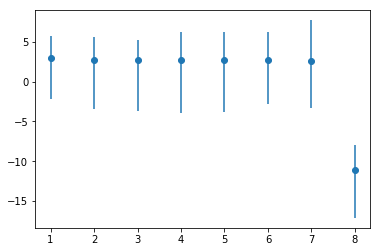

In [9]:
rfit = np.log10(analyze.relative_errors_vs_dimmensions_fitted_function)
median = np.median(rfit, axis=1)
up = np.max(rfit, axis=1)
low = np.min(rfit, axis=1)
errorbar = (low - median, median - up)

plt.errorbar(np.arange(rfit.shape[0]) + 1, median, errorbar, fmt='o')
plt.show()
plt.close()

In [11]:
np.shape(analyze.fitted_functions_reduced)

(8, 20000, 1006)

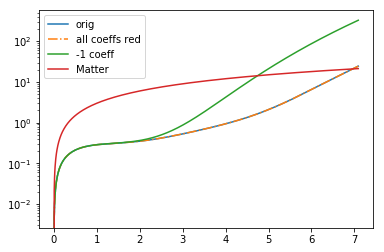

In [17]:
ix = 1

c = analyze.hist_orig_scale_orig.data[:, ix]
X = analyze.lna
Y = wicmath.Taylor_legacy_c0(X, c)
plt.plot(X, Y, label='orig')
Y = analyze.fitted_functions_reduced[-1][ix]
plt.plot(X, Y, label='all coeffs red', ls='-.')
Y = analyze.fitted_functions_reduced[-2][ix]
plt.plot(X, Y, label='-1 coeff')
Y = 3 * X
plt.plot(X, Y, label='Matter')

plt.yscale('log')
plt.legend(loc=0)
plt.show()
plt.close()

In [125]:
step = n[0]
for i in range(8):
    ci = analyze.transfMatrix[:8 - i].T.dot(d[:8-i, step]) + np.mean(analyze.hist_orig_scale_orig.data, axis=1)
    logXi = wicmath.Taylor_legacy_c0(analyze.lna, ci)
    X = np.exp(logXi)
    imax = np.argmax(np.abs(logXi))
    print 'With {} coeffs'.format(8-i)
    print ci
    print imax, logXi[imax]
    print (~np.isfinite(X)).any()
    print 'Reldev ', analyze.obs_reldev['max'][7 - i][step]
    print

With 8 coeffs
[ 0.8  -0.72 -0.3   1.54 -1.4   0.39  0.05 -0.03]
0 -109822.10134385576
False
Reldev  0.002879259238022458

With 7 coeffs
[ 0.8  -0.72 -0.3   1.54 -1.4   0.39  0.05 -0.03]
0 -106249.15758711408
False
Reldev  0.0031049427733276236

With 6 coeffs
[ 0.8  -0.72 -0.3   1.53 -1.41  0.39  0.05 -0.03]
0 -90798.7982702371
False
Reldev  0.003581402535743017

With 5 coeffs
[ 0.81 -0.7  -0.27  1.56 -1.39  0.39  0.02 -0.02]
0 -55360.614509464045
False
Reldev  0.0038415523220176606

With 4 coeffs
[ 0.76 -0.8  -0.34  1.55 -1.32  0.47 -0.07  0.  ]
0 -7006.1139375546045
False
Reldev  0.01284355575352003

With 3 coeffs
[ 0.87 -0.65 -0.37  1.4  -1.37  0.63 -0.14  0.01]
0 8243.086086098512
True
Reldev  nan

With 2 coeffs
[ 1.09 -0.52 -0.71  1.38 -1.04  0.41 -0.08  0.01]
0 7247.475760183115
True
Reldev  nan

With 1 coeffs
[ 0.31 -0.   -0.76  1.18 -0.85  0.33 -0.07  0.01]
0 6217.562184659335
True
Reldev  nan



/usr/lib64/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


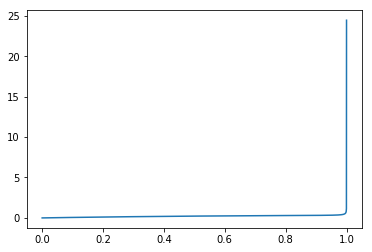

In [116]:
logXi = wicmath.Taylor_legacy_c0(analyze.lna, c[:, 1])
#plt.plot(np.tanh(analyze.z), logXi)
# plt.plot(analyze.lna, logXi)
plt.plot(np.tanh(analyze.lna), logXi)

# Check observables

In [ ]:
# from analyze_coeffs import Analyze

# outdir =  '../prueba3/quintessence_monomial-ints-fit-logX-8-Taylor_legacy_c0-ln(1+z)'
# rho_file = '../prueba3/quintessence_monomial-ints-fit-logX-8-Taylor_legacy_c0-ln(1+z)/quintessence_monomial-ints/computed_data/original-rho0s.txt'

# analyze = Analyze(
#     preroot = outdir,
    
# )

# cosmo3 = Class()
# cosmo3.set(analyze.class_params[0])
# cosmo3.compute()
# b = cosmo3.get_background()
# obs, rec = co.compute_observables_th(cosmo3, 10)

# z = b['z']
# analyze.z = z[z<=rec[0]+200]
# analyze.lna = np.log(analyze.z + 1)
# analyze.redshift_reldevs = analyze.z<=analyze.z_low_redshift_fit
# analyze.time_array = analyze._get_time_array()

# analyze.prepare_histograms()
# analyze.compute_H_DA_f()
# #analyze.compute_H_DA_f_reduced_to_compare_with_exact()
# analyze.compute_H_DA_f_reduced()
# analyze.compute_relative_error_vs_dimensions_observables()

# from analyze_coeffs import _maxreldev
# print np.max(np.abs(analyze.obs_reduced['H'][-1][0]/analyze.obs['H'][0] - 1))
# print _maxreldev(analyze.obs['H'], analyze.obs_reduced['H'][-1])[0]

In [23]:
from classy import CosmoComputationError
indices_compu = np.argwhere(np.all(np.isnan(analyze.obs_reldev['DA']),axis=0))

for ix in indices_compu[:, 0]:
    cosmo2 = Class()
    cosmo2.set(analyze.class_params[ix])
    try:
        cosmo2.compute()
    except CosmoComputationError:
        print ix, 'CosmoComputationError'
        continue
    except Exception as e:
        print ix, str(e)
        print ""
        continue
    b = cosmo2.get_background()
    rho0_m = b['(.)rho_b'][-1] + b['(.)rho_cdm'][-1]
    rho0_rad = b['(.)rho_g'][-1] + b['(.)rho_ur'][-1]
    rho0_DE = b['(.)rho_smg'][-1]
    obs, rec = co.compute_observables_th(cosmo2, 10)
    _, H, DA, f = obs
    zrec = rec[0]

In [24]:
from classy import CosmoComputationError
indices = np.argwhere(np.any(np.isnan(analyze.obs_reldev['DA'])) and 
                      (~np.all(np.isnan(analyze.obs_reldev['DA']),axis=0)))
# print indices

for ix in indices[:, 0]:
    cosmo2 = Class()
    cosmo2.set(analyze.class_params[ix])
    try:
        cosmo2.compute()
    except CosmoComputationError:
        print ix, 'CosmoComputationError'
        continue
    except Exception as e:
        print ix, str(e)
        print ""
        continue
    b = cosmo2.get_background()
    rho0_m = b['(.)rho_b'][-1] + b['(.)rho_cdm'][-1]
    rho0_rad = b['(.)rho_g'][-1] + b['(.)rho_ur'][-1]
    rho0_DE = b['(.)rho_smg'][-1]
    obs, rec = co.compute_observables_th(cosmo2, 10)
    _, H, DA, f = obs
    zrec = rec[0]

In [25]:
rhos = np.loadtxt(rho_file)

obs = 'DA'
rhoDE_fit_inf = []
obs_fit_inf = []
indices_nocompu_noinf = []
indices_nocompu = []
A = np.argwhere(np.any(np.isnan(analyze.obs_reduced[obs]), axis=2)) # [:,indices.reshape((-1))])
    
for i in A:
    ix_red, ix = i
    if ix in indices_compu.reshape((-1)):
        continue
    indices_nocompu.append(i)

    ############ CLASS #############
    cosmo2 = Class()
    cosmo2.set(analyze.class_params[ix])
    cosmo2.compute()
    b = cosmo2.get_background()
    rho0_m = b['(.)rho_b'][-1] + b['(.)rho_cdm'][-1]
    rho0_rad = b['(.)rho_g'][-1] + b['(.)rho_ur'][-1]
    rho0_DE = b['(.)rho_smg'][-1]
    obs, rec = co.compute_observables_th(cosmo2, 10)
    _, H, DA, f = obs
    zrec = rec[0]

    ############ analyze_coeffs.py ############
    z = analyze.z
    rhoM = rhos[ix][0] * (1+z)**3
    rhoR = rhos[ix][1] * (1+z)**4
    rhoDE_fit = rhos[ix][2] * np.exp(analyze.fitted_functions_reduced[ix_red][ix])
    w_fit = analyze.w_reduced[ix_red][ix]

    obs_fit, rec_fit = co.compute_observables_fit(z, rhoM, rhoR, rhoDE_fit, 
                                                  w_fit, f[0], z_rec=zrec)
    # _, H_fit, DA_fit, f_fit = obs_fit

    # H_reldev = H_fit[z<10] / H -1
    # DA_fit2 = DA_fit.copy()
    # DA_fit2[DA_fit2 == 0] = 1e-100
    # DA2 = DA.copy()
    # DA2[DA2 == 0] = 1e-100
    # DA_reldev = DA_fit2[z<10] / DA2 -1
    # f_reldev = f_fit[z<10] / f -1

    if not np.isfinite(rhoDE_fit).all():
        rhoDE_fit_inf.append(i.copy())
    elif not np.isfinite(obs_fit).all():
        obs_fit_inf.append(i)
    else:
        print i
        indices_nocompu_noinf.append(i)
    
rhoDE_fit_inf = np.array(rhoDE_fit_inf)
obs_fit_inf = np.array(obs_fit_inf)
indices_nocompu_noinf = np.array(indices_nocompu_noinf)
indices_nocompu = np.array(indices_nocompu)

print 'All errors come from rhoDE_fit == inf: ', np.all(rhoDE_fit_inf == indices_nocompu)
    # print 'check ', np.sum(np.isnan(analyze.obs_reduced['DA'][ix_red][ix])), 'out of ', len(analyze.obs_reduced['DA'][ix_red][ix])

# print np.isfinite(rhoM).all()
# print np.isfinite(rhoR).all()
# print 'rhoDE_fit ', n
# print np.isfinite(w_fit).all()
# print np.isfinite(obs_fit).all()
# print np.isfinite(H_reldev).all()
# print np.isfinite(DA_reldev).all()
# print np.isfinite(f_reldev).all()

All errors come from rhoDE_fit == inf:  True


In [26]:
indices_nocompu

array([], dtype=float64)

In [27]:
for i in np.argwhere(np.isnan(analyze.obs_reldev['max'])):
    if i in indices_compu:
        pass
    elif i in rhoDE_fit_inf:
        pass
    else:
        print i

In [30]:
rhos = np.loadtxt(rho_file)

obs = 'DA'
A = np.argwhere(np.all(np.isfinite(analyze.obs_reduced[obs]), axis=2)) # [:,indices.reshape((-1))])
    
for c, i in enumerate(A):
    ix_red, ix = i

    z = analyze.z
    ############ CLASS #############
    cosmo2 = Class()
    cosmo2.set(analyze.class_params[ix])
    cosmo2.compute()
    b = cosmo2.get_background()
    rho0_m = b['(.)rho_b'][-1] + b['(.)rho_cdm'][-1]
    rho0_rad = b['(.)rho_g'][-1] + b['(.)rho_ur'][-1]
    rho0_DE = b['(.)rho_smg'][-1]
    obs, rec = co.compute_observables_th(cosmo2, 10, z_output=z[z<=10])  # z_output necessary!
    zobs, H, DA, f = obs
    zrec = rec[0]
    cosmo2.struct_cleanup()
    cosmo2.empty()

    ############ analyze_coeffs.py ############
    # rhoM = rhos[ix][0] * (1+z)**3
    # rhoR = rhos[ix][1] * (1+z)**4
    # rhoDE_fit = rhos[ix][2] * np.exp(analyze.fitted_functions_reduced[ix_red][ix])
    rhoM = rho0_m * (1+z)**3
    rhoR = rho0_rad * (1+z)**4
    rhoDE_fit = rho0_DE * np.exp(analyze.fitted_functions_reduced[ix_red][ix])    
    w_fit = analyze.w_reduced[ix_red][ix]

    obs_fit, rec_fit = co.compute_observables_fit(z, rhoM, rhoR, rhoDE_fit, 
                                                  w_fit, f[0], z_rec=zrec, index_to_compare=(z<=10))
    zobs_fit, H_fit, DA_fit, f_fit = obs_fit

    H_fit2 = np.sqrt(rhoM[z<=10] + rhoR[z<=10] + rhoDE_fit[z<=10])
    H_reldev = np.max(np.abs(H_fit / H -1))
    H_reldev2 = np.max(np.abs(H_fit2 / H -1))
    DA_fit2 = DA_fit.copy()
    DA_fit2[DA_fit2 == 0] = 1e-100
    DA2 = DA.copy()
    DA2[DA2 == 0] = 1e-100
    # DA_reldev = np.nanmax(np.abs(DA_fit / DA -1))
    DA_reldev2 = np.max(np.abs(DA_fit2 / DA2 -1))
    f_reldev = np.max(np.abs(f_fit / f -1))
    DArec_reldev = np.abs(rec_fit[1]/rec[1] - 1)
    
    # print i
    # print H_reldev, analyze.obs_reldev['H'][ix_red][ix]
    # # print H_reldev2, analyze.obs_reldev['H'][ix_red][ix]
    # print DA_reldev, analyze.obs_reldev['DA'][ix_red][ix]
    # # print DA_reldev2, analyze.obs_reldev['DA'][ix_red][ix]
    # print f_reldev, analyze.obs_reldev['f'][ix_red][ix]
    # print DArec_reldev, analyze.obs_reldev['DA_rec'][ix_red][ix]
    if not np.isclose(H_reldev, analyze.obs_reldev['H'][ix_red][ix]):
        print i, 'H differe'
    if not np.isclose(DA_reldev2, analyze.obs_reldev['DA'][ix_red][ix]):
        print i, 'DA differe'
    if not np.isclose(f_reldev, analyze.obs_reldev['f'][ix_red][ix]):
        print i, 'f differe'
    if not np.isclose(DArec_reldev, analyze.obs_reldev['DA_rec'][ix_red][ix]):
        print i, 'DA_rec differe'

    
# print 'check ', np.sum(np.isnan(analyze.obs_reduced['DA'][ix_red][ix])), 'out of ', len(analyze.obs_reduced['DA'][ix_red][ix])

# print np.isfinite(rhoM).all()
# print np.isfinite(rhoR).all()
# print 'rhoDE_fit ', n
# print np.isfinite(w_fit).all()
# print np.isfinite(obs_fit).all()
# print np.isfinite(H_reldev).all()
# print np.isfinite(DA_reldev).all()
# print np.isfinite(f_reldev).all()

In [ ]:
# Check residuals from fit and errors with analyze match.

reldev_ar = [monomial.obs_reldev['H'], monomial.obs_reldev['DA'], monomial.obs_reldev['f'],
             monomial.obs_reldev['DA_rec']]
reldev_ar2 = monomial.residualsHist.data[1:-1:2]
irange = np.arange(len(reldev_ar))

f, axs = plt.subplots(2, 2, figsize=(8, 6))
for i, ax in zip(irange, axs.reshape((-1))):
    ax.hist([reldev_ar[i], reldev_ar2[i]], bins=60, normed=True, histtype='step',
           lw=2, label=['analyze', 'fit'], linestyle)
    
    ax.set_xlabel(['H', 'DA', 'f', 'DA_rec'][i])
    if i<3:
        ax.axvline(np.log10(1e-2), c='black')
    else:
        ax.axvline(np.log10(3e-3), c='black')
        
    
axs[0, 0].legend(loc=0)
plt.tight_layout()
plt.show()
plt.close()